<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="f1race.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> F1 Race Prediction 
                </font>
            </div>
        </td>
    </tr>
</table>

Description : We have data for all the races in all the circuits in all climatic conditions and track
conditions. This will help us in predicting a model which will take all the factors in
account that may impact the race in any way. Based on this model, we can predict the
P1,P2 and P3 of the race and develop a strategy to beat them in a much professional
way.


## Table of Content

1. **[Import Libraries](#lib)**
2. **[Analysis of Datasets:](#prep)**
    - 2.1 - **[Circuits](#read)**
    - 2.2 - **[Drivers](#r)**
    - 2.3 - **[Pits](#re)**
    - 2.4 - **[Results](#sc)**
    - 2.5 - **[Laps](#la)**
    - 2.6 - **[Races](#c)**
3. **[Merging Of Every DataFrames](#def)**
4. **[Feature Engineering](#ff)**

<a id="lib"></a>
# 1. Import Libraries

In [1]:
# import the library NumPy 
import numpy as np

# import the library Pandas
import pandas as pd

# import the library matplotlib
import matplotlib.pyplot as plt

# import thelibrary seaborn
import seaborn as sns

# import the library plotly
import plotly

# to suppress warnings
# import the library warnings 
import warnings
# filterwarnings() filters a warning 
# action: the action to be taken if a warning is shown
warnings.filterwarnings(action = 'ignore')
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

<a id="prep"></a>
### Analysis of Datasets:


<a id="read"></a>
###### 1. Circuits

In [2]:
# Load Dataset 
print("Info on Data Set")
print("-----------------")
cir = pd.read_csv("circuits.csv")
cir.head()

Info on Data Set
-----------------


circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [3]:
# Drop unnecessary variable 
circ = cir.drop(columns = ['country', 'lat', 'lng','alt','url'])
circ.head()

circuitId   circuitRef                            name      location
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne
1          2       sepang    Sepang International Circuit  Kuala Lumpur
2          3      bahrain   Bahrain International Circuit        Sakhir
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló
4          5     istanbul                   Istanbul Park      Istanbul

In [4]:
# Cheacking of the DataTypes 
circ.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   circuitId   77 non-null     int64 
 1   circuitRef  77 non-null     object
 2   name        77 non-null     object
 3   location    77 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


There is no null value

In [5]:
# Checking Circuit count as per Location 
circ['location'].value_counts()

Spielburg           2
California          2
Barcelona           2
Castle Donington    1
Monza               1
                   ..
Nevada              1
Le Mans             1
Clermont-Ferrand    1
Portimão            1
Hanoi               1
Name: location, Length: 74, dtype: int64

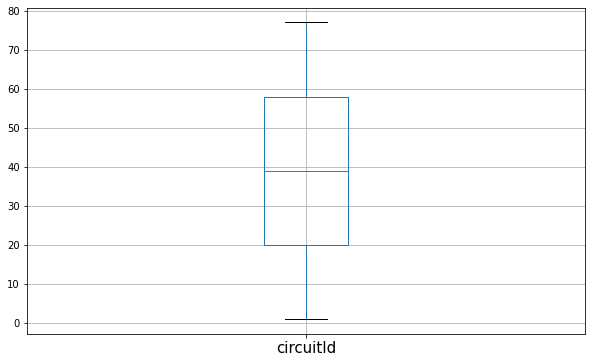

In [6]:
# checking Outliers using BoxPlot()
plt.figure(figsize = (10,6))
circ.boxplot()
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

There is no need of outliers treatment

<a id="r"></a>
###### 2.Drivers

In [7]:
##Importing datasets
drivers_df=pd.read_csv("drivers.csv")

##Checking the dataframe
drivers_df.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [8]:
#here we concatetnate forename and surname as driver and drop 'driverRef','number','code','forename','surname','dob','url'.

drivers_df["driver"]=drivers_df["forename"]+" "+drivers_df["surname"]
drivers_df.drop(columns = {'driverRef','number','code','forename','surname','dob','url'}, inplace = True)
drivers_df.head(1)

driverId nationality          driver
0         1     British  Lewis Hamilton

In [9]:
# Cheacking of the DataTypes 
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     853 non-null    int64 
 1   nationality  853 non-null    object
 2   driver       853 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.1+ KB


In [10]:
drivers_df['driverId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
#n(n+1)/2 is equal sum of 1 to n series here n = 854

n = 854
sum1 = n*(n+1)/2
print('sum',sum1)

drivers_df['driverId'].unique().sum()

sum 365085.0


364276

So we can see some driverid are missing.

In [12]:
# Checking counts of drivers as per thier Nationality 
drivers_df['nationality'].value_counts()

British              165
American             157
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
South African         23
Belgian               23
Swiss                 23
Japanese              20
Dutch                 17
Australian            17
Spanish               15
Austrian              15
Canadian              14
Swedish               10
New Zealander          9
Finnish                9
Mexican                6
Irish                  5
Danish                 5
Russian                4
Monegasque             4
Portuguese             4
Uruguayan              4
Rhodesian              4
Colombian              3
East German            3
Venezuelan             3
Indian                 2
Thai                   2
Czech                  1
Chilean                1
Argentine-Italian      1
American-Italian       1
Hungarian              1
Liechtensteiner        1
Polish                 1
Malaysian              1


In [13]:
labels = list(drivers_df['nationality'].value_counts().index)
values = drivers_df['nationality'].value_counts()
# colors = ['mediumslateblue', 'darkorange']

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=11,
                  marker=dict( line=dict(color='#000000', width=3)))

fig.update_layout(width=800, height=800,title="Nationality Distribution of Drivers",
                  titlefont={'size': 20},      
                  )
fig.show()

Here we can see that British, American, Italian are in majority.

<a id="re"></a>
###### 3. Pits

In [14]:
# Loading DataSets 
pit_df = pd.read_csv('pit_stops.csv')
pit_df.rename(columns = {'stop':'stop_no', 'lap':'stop_lap', 'milliseconds':'stop_duration(ms)'}, inplace = True)
pit_df.drop(columns = ['duration','time'], inplace = True)
(pit_df.head(1))

raceId  driverId  stop_no  stop_lap  stop_duration(ms)
0     841       153        1         1              26898

In [15]:
# Cheacking of the DataTypes 
pit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   raceId             8223 non-null   int64
 1   driverId           8223 non-null   int64
 2   stop_no            8223 non-null   int64
 3   stop_lap           8223 non-null   int64
 4   stop_duration(ms)  8223 non-null   int64
dtypes: int64(5)
memory usage: 321.3 KB


There is no null value present.

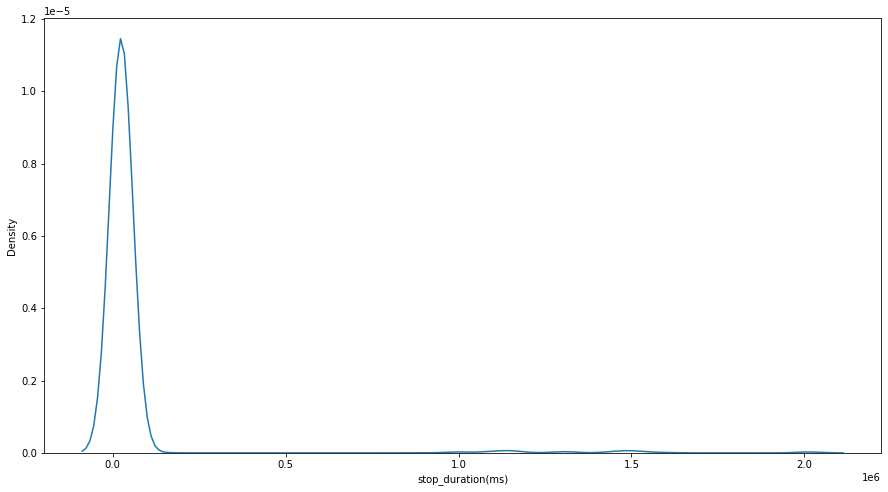

In [16]:
# Checking skeweness of the data
plt.figure(figsize=(15,8))
sns.kdeplot(pit_df['stop_duration(ms)'])

plt.show()

positive skewed data....

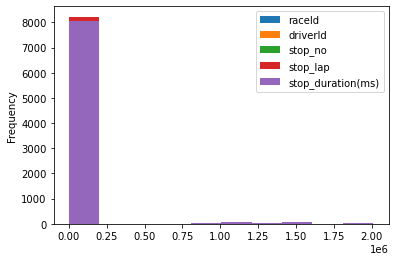

In [17]:
pit_df.plot(kind = 'hist')
plt.show()


In [18]:
pit_df['stop_duration(ms)'].skew()

6.8216781128848165

In [19]:
#Checking DataType 
pit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   raceId             8223 non-null   int64
 1   driverId           8223 non-null   int64
 2   stop_no            8223 non-null   int64
 3   stop_lap           8223 non-null   int64
 4   stop_duration(ms)  8223 non-null   int64
dtypes: int64(5)
memory usage: 321.3 KB


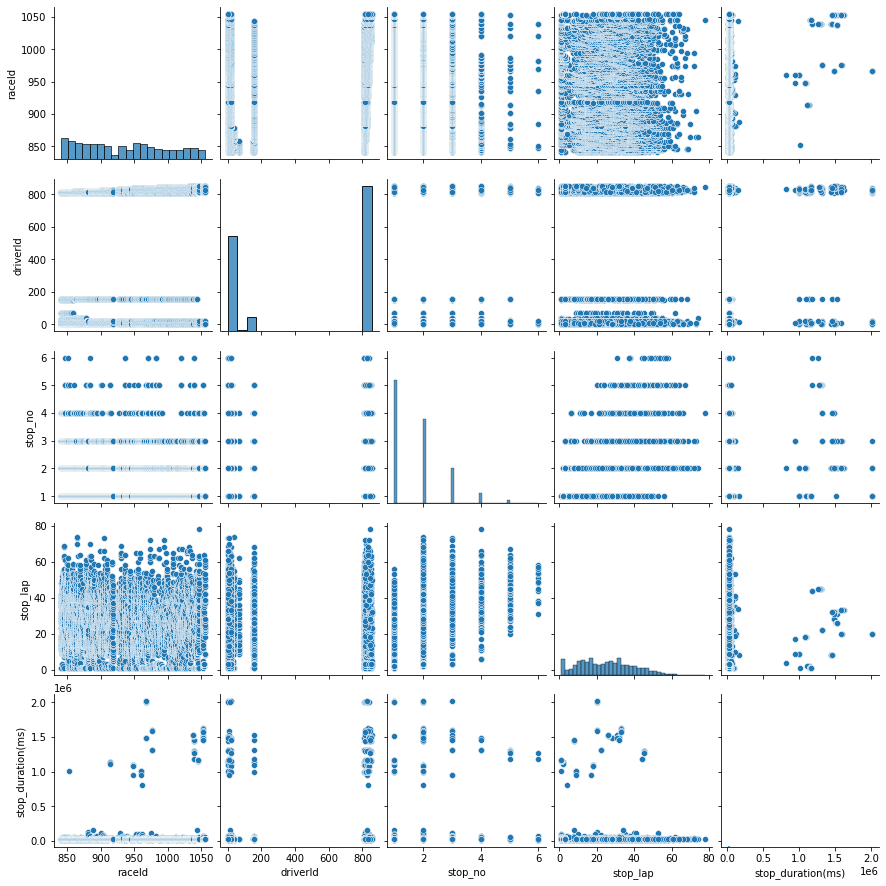

In [20]:
# Checking relation Between Variable 
sns.pairplot(pit_df)
plt.show()

we can't find any relation between columns

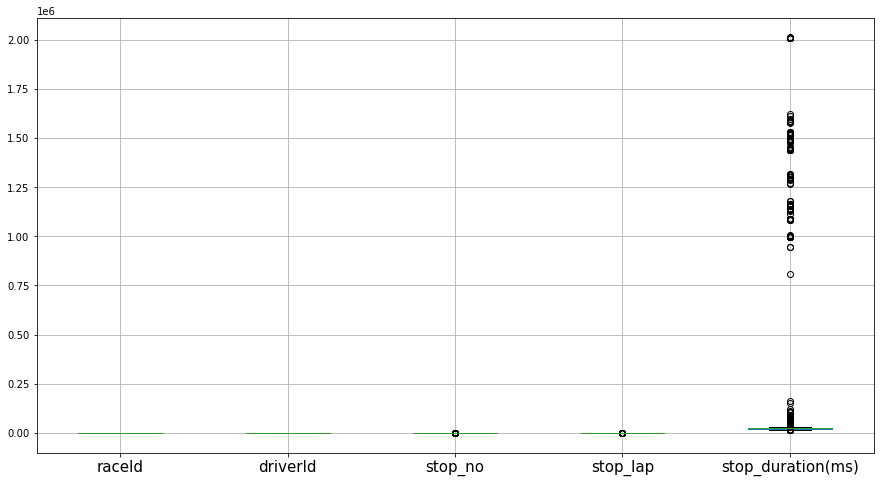

In [21]:
# Checking Outliers 

plt.figure(figsize = (15,8))
pit_df.boxplot()
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

In stop_duration we have outliers only but we can't remove them as we need them.

<a id="sc"></a>
###### 4. Results

In [22]:
#Loading Dataset
results_df=pd.read_csv("results.csv")
results_df.drop(columns = {'constructorId','number','positionText','positionOrder','time', 'fastestLap','rank','fastestLapTime','fastestLapSpeed'}, inplace = True)
results_df.rename(columns = {'milliseconds':'race_duration'}, inplace = True)
results_df.head(1)

resultId  raceId  driverId  grid position  points  laps race_duration  \
0         1      18         1     1        1    10.0    58       5690616   

   statusId  
0         1

In [23]:
# Cheacking of the DataTypes 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   resultId       25040 non-null  int64  
 1   raceId         25040 non-null  int64  
 2   driverId       25040 non-null  int64  
 3   grid           25040 non-null  int64  
 4   position       25040 non-null  object 
 5   points         25040 non-null  float64
 6   laps           25040 non-null  int64  
 7   race_duration  25040 non-null  object 
 8   statusId       25040 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.7+ MB


There is no null value present.

##### There are so many '\N' value present in race_duration so we replace it with '0'

In [24]:
results_df['race_duration'].replace(r'\N','0', inplace = True)

##### In position we have one '\N' value we don't know about that position so we replace it wih '0'

In [25]:
results_df['position'].replace(r'\N','0', inplace = True)

###### Since, solution for the problem is to use a Binary classification of the ‘Podium Positions’ where top 3 can be labelled with the digit ‘1’ and the other positions can be labelled with digit ‘0’.


In [26]:
results_df=results_df.replace(to_replace =['4', '5', '6', '7', '8', '0', '9', '10', '11', '12','13', '14', '15',
                                '16', '17', '18', '19', '20', '21', '22', '23','24', '25', '26', '27',
                                '28', '29', '30', '31', '32', '33'],  value ='0')

In [27]:
results_df=results_df.replace(to_replace =['1', '2', '3'],  value ='1')

In [28]:
results_df['position'].unique()

array(['1', '0'], dtype=object)

###### Now, we have only two value '1' and '0' in position column

In [29]:
results_df['position'].value_counts()

0    21902
1     3138
Name: position, dtype: int64

we can see there are '21902' and '3138', '0' and '1' values respectively


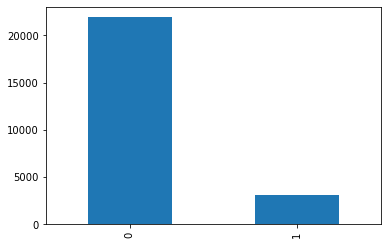

In [30]:
results_df['position'].value_counts().plot(kind='bar')
plt.show()

In [31]:
#here race_duration is numeric column we need to covert it in int..
results_df['race_duration']=results_df['race_duration'].astype('int64')

In [32]:
#here race_duration is numeric column we need to covert it in int..

results_df['position']=results_df['position'].astype('int64')

In [33]:
results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   resultId       25040 non-null  int64  
 1   raceId         25040 non-null  int64  
 2   driverId       25040 non-null  int64  
 3   grid           25040 non-null  int64  
 4   position       25040 non-null  int64  
 5   points         25040 non-null  float64
 6   laps           25040 non-null  int64  
 7   race_duration  25040 non-null  int64  
 8   statusId       25040 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.7 MB


We convert 'position' and 'race_duration' in 'int64'

<a id="la"></a>
###### 5. Laps

In [34]:
# Loading Dataset
lap = pd.read_csv('lap_times.csv')

# Drop Time variable as milliseconds is sufficiant to infer 

laps = lap.drop(columns = ['time'])
laps.head()

raceId  driverId  lap  position  milliseconds
0     841        20    1         1         98109
1     841        20    2         1         93006
2     841        20    3         1         92713
3     841        20    4         1         92803
4     841        20    5         1         92342

In [35]:
# Cheacking of the DataTypes 
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495544 entries, 0 to 495543
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   raceId        495544 non-null  int64
 1   driverId      495544 non-null  int64
 2   lap           495544 non-null  int64
 3   position      495544 non-null  int64
 4   milliseconds  495544 non-null  int64
dtypes: int64(5)
memory usage: 18.9 MB


There is no null value there

In [36]:
# Check for Unique Value
laps['position'].unique()

array([ 1,  3,  4,  2,  7,  8,  6,  5, 11, 12, 10,  9, 13, 16, 17, 15, 14,
       18, 19, 20, 21, 22, 24, 23], dtype=int64)

In [37]:
#n(n+1)/2 is equal sum of 1 to n series here n = 24


n = 24
sum0 = n*(n+1)/2
print('sum',sum0)

laps['position'].unique().sum()

sum 300.0


300

We can say there are 24 position

In [38]:
# Check for Unique Value
laps['lap'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87], dtype=int64)

In [39]:
#n(n+1)/2 is equal sum of 1 to n series here n = 87

n = 87
sum2 = n*(n+1)/2
print('sum',sum2)

laps['lap'].unique().sum()

sum 3828.0


3828

We can say there are 87 laps

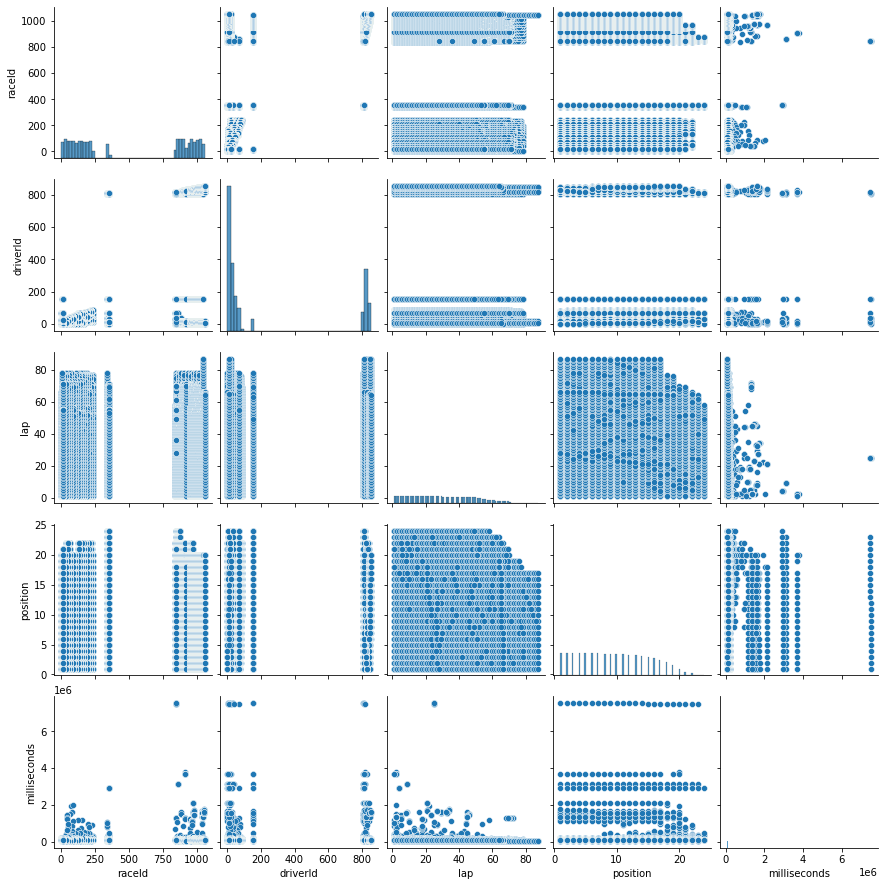

In [40]:
# Check for relation Between Variables 
sns.pairplot(laps)
plt.show()

There is no such relation we can see there

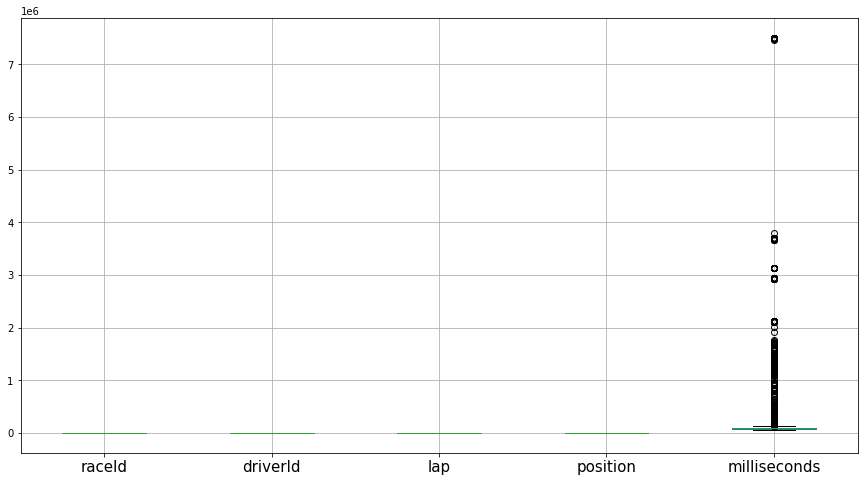

In [41]:
# Checking Outliers 

plt.figure(figsize = (15,8))
laps.boxplot()
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

Only milliseconds have outliers, 
but we don't need remove them because we need this data to prediction

In [42]:
x = laps.groupby(['raceId'])['milliseconds'].sum()
x.sort_values(ascending=True)

raceId
79      32452859
237     56592654
154     59451141
124     60314524
2       60808789
         ...    
908    166227148
967    198522976
353    218112478
861    227837208
847    328030664
Name: milliseconds, Length: 458, dtype: int64

Checking which RaceId taking less time to complete all the laps.Hence raceid '79' taking less time to complete the race and raceid '847' taking highest time to cover the race.

<a id="c"></a>
###### 6. Races

In [43]:
# Loading DataSets 
races_df = pd.read_csv('races.csv')
races_df.head(1)
races_df.rename(columns = {'name': 'race_name'}, inplace = True)
races_df.drop(columns = {'date','time','url'}, inplace = True)

races_df.head(1)

raceId  year  round  circuitId              race_name
0       1  2009      1          1  Australian Grand Prix

In [44]:
# Cheacking of the DataTypes 
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1058 non-null   int64 
 1   year       1058 non-null   int64 
 2   round      1058 non-null   int64 
 3   circuitId  1058 non-null   int64 
 4   race_name  1058 non-null   object
dtypes: int64(4), object(1)
memory usage: 41.5+ KB


There is no null value present.

In [45]:
# Checking unique Values 

races_df['raceId'].unique()

array([   1,    2,    3, ..., 1071, 1072, 1073], dtype=int64)

In [46]:
#n(n+1)/2 is equal sum of 1 to n series here n = 1073

n = 1073
sum3 = n*(n+1)/2
print('sum',sum3)

races_df['raceId'].unique().sum()

sum 576201.0


562043

We  can see that some raceId are missing. 

In [47]:
# Counts of the races according to every Year 
races_df['year'].value_counts()


2021    23
2019    21
2018    21
2016    21
2017    20
        ..
1956     8
1957     8
1961     8
1955     7
1950     7
Name: year, Length: 72, dtype: int64

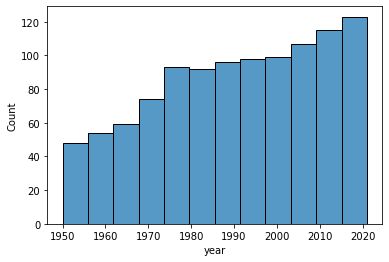

In [48]:
sns.histplot(races_df['year'])
plt.show()

Every 10 year number of races are increasing

In [49]:
## number of races every year

labels = list(races_df['year'].value_counts().index)
values = races_df['year'].value_counts()
# colors = ['mediumslateblue', 'darkorange']

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=10,
                  marker=dict( line=dict(color='#000000', width=3)))
fig.update_layout(title="Race distribution over the Years",
                  titlefont={'size': 20},      
                  )
fig.show()

Year by year number of races increases

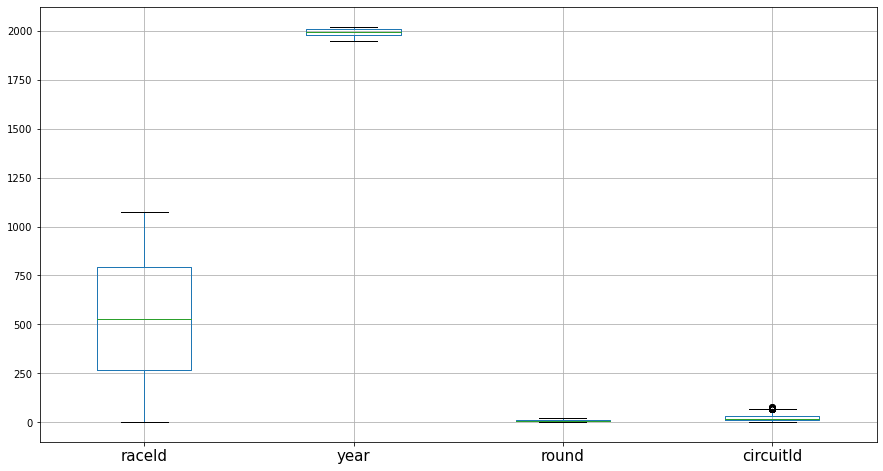

In [50]:
# Checking Otuliers
plt.figure(figsize = (15,8))
races_df.boxplot()
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

There is no need of outliers treatment.

71    66    65    64    63    70    67    68    52    62  ...    5   \
year    1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  ...  2012   
raceId     7     8     8     9     9     7     8     8    11     9  ...    20   

          9     8     7     3     4     2     1     23    0   
year    2013  2014  2015  2016  2017  2018  2019  2020  2021  
raceId    19    19    19    21    20    21    21    17    23  

[2 rows x 72 columns]

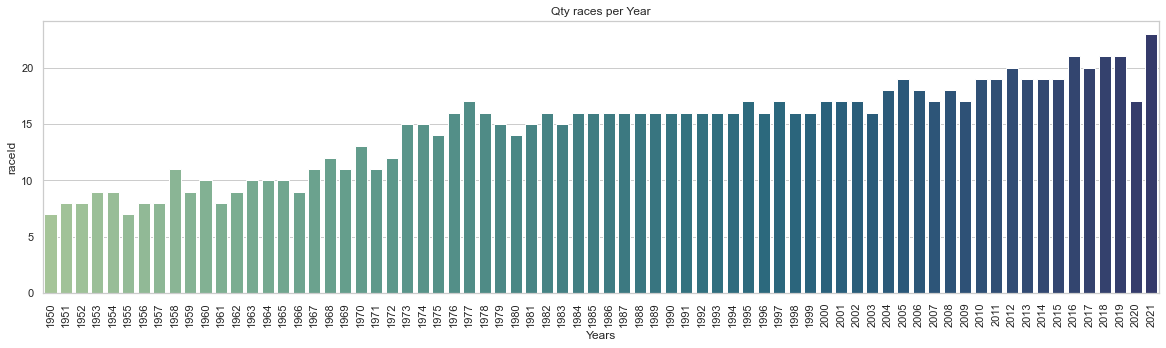

In [51]:
#Viewing the number of Steps per year
sns.set_theme(style='whitegrid')
fig, axis = plt.subplots(1,1, figsize=(20, 5), sharex=True)

races_plot = races_df['year'].value_counts().reset_index()
races_plot.columns = ['year', 'raceId']
races_plot.rename(columns={'year' : 'raceId'})
races_plot.sort_values(by=['year'], inplace=True)
races_plot.sort_values(by=['year'])

graph = sns.barplot(x=races_plot['year'], y=races_plot['raceId'], palette="crest")
graph.set(title='Qty races per Year', xlabel='Years', ylabel='raceId')
graph.set_xticklabels(labels=graph.get_xticklabels(), rotation=90)

max = races_plot.describe() * 1.1
max_y = 0

_, max_y_f = graph.get_ylim()
max_y = max_y_f if max_y_f > max_y else max_y
graph.set(ylim=(0, max_y))

fig.show()
races_plot.transpose()

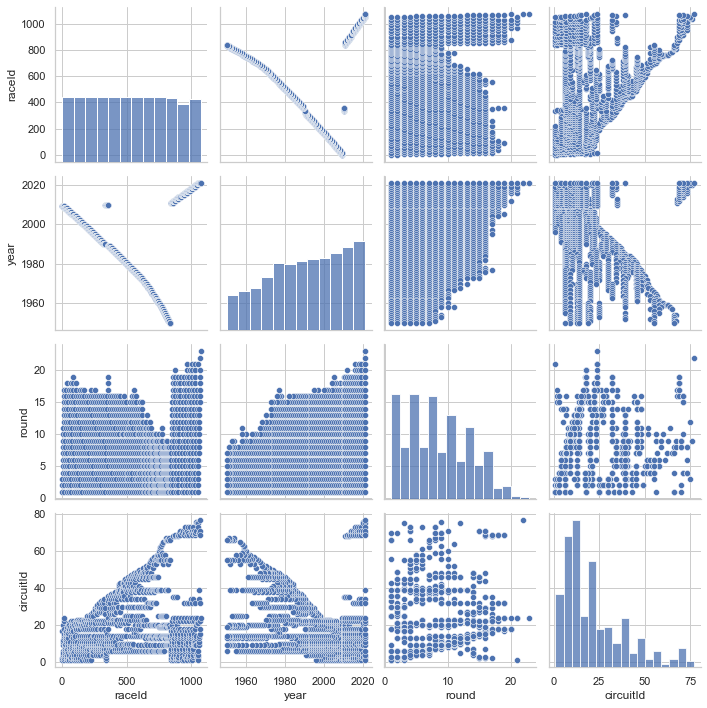

In [52]:
#Realtion between variables 
sns.pairplot(races_df)
plt.show()

<a id="def"></a>
# Merging Of Every DataFrames 

In [53]:
##Left join of Results and pits

new_df = pd.DataFrame()
new_df = results_df.merge(pit_df, how = 'left', on = ['raceId', 'driverId'])
new_df.head(1)

resultId  raceId  driverId  grid  position  points  laps  race_duration  \
0         1      18         1     1         1    10.0    58        5690616   

   statusId  stop_no  stop_lap  stop_duration(ms)  
0         1      NaN       NaN                NaN

In [54]:
##Left Join of Results+ Races with Pit stops

new_df = new_df.merge(races_df, how = 'left', on = 'raceId')

new_df.head(1)

resultId  raceId  driverId  grid  position  points  laps  race_duration  \
0         1      18         1     1         1    10.0    58        5690616   

   statusId  stop_no  stop_lap  stop_duration(ms)  year  round  circuitId  \
0         1      NaN       NaN                NaN  2008      1          1   

               race_name  
0  Australian Grand Prix

In [55]:
##Left Join of Results+ Races+ Pit stops with drivers

new_df = new_df.merge(drivers_df, how = 'left', on = 'driverId')
new_df.head()

resultId  raceId  driverId  grid  position  points  laps  race_duration  \
0         1      18         1     1         1    10.0    58        5690616   
1         2      18         2     5         1     8.0    58        5696094   
2         3      18         3     7         1     6.0    58        5698779   
3         4      18         4    11         0     5.0    58        5707797   
4         5      18         5     3         0     4.0    58        5708630   

   statusId  stop_no  stop_lap  stop_duration(ms)  year  round  circuitId  \
0         1      NaN       NaN                NaN  2008      1          1   
1         1      NaN       NaN                NaN  2008      1          1   
2         1      NaN       NaN                NaN  2008      1          1   
3         1      NaN       NaN                NaN  2008      1          1   
4         1      NaN       NaN                NaN  2008      1          1   

               race_name nationality             driver  
0  Australian Grand Prix     British     Lewis Hamilton  
1  Australian Grand Prix      German      Nick Heidfeld  
2  Australian Grand Prix      German       Nico Rosberg  
3  Australian Grand Prix     Spanish    Fernando Alonso  
4  Australian Grand Prix     Finnish  Heikki Kovalainen

In [56]:
new_merged = new_df


In [57]:
new_merged.shape


(29293, 18)

In [58]:
new_merged

resultId  raceId  driverId  grid  position  points  laps  \
0             1      18         1     1         1    10.0    58   
1             2      18         2     5         1     8.0    58   
2             3      18         3     7         1     6.0    58   
3             4      18         4    11         0     5.0    58   
4             5      18         5     3         0     4.0    58   
...         ...     ...       ...   ...       ...     ...   ...   
29288     25043    1055       854    18         0     0.0    64   
29289     25043    1055       854    18         0     0.0    64   
29290     25044    1055       853    20         0     0.0    64   
29291     25044    1055       853    20         0     0.0    64   
29292     25045    1055       852    16         0     0.0     6   

       race_duration  statusId  stop_no  stop_lap  stop_duration(ms)  year  \
0            5690616         1      NaN       NaN                NaN  2008   
1            5696094         1      NaN       NaN                NaN  2008   
2            5698779         1      NaN       NaN                NaN  2008   
3            5707797         1      NaN       NaN                NaN  2008   
4            5708630         1      NaN       NaN                NaN  2008   
...              ...       ...      ...       ...                ...   ...   
29288              0        12      1.0      23.0            24006.0  2021   
29289              0        12      2.0      50.0            22310.0  2021   
29290              0        12      1.0      22.0            23098.0  2021   
29291              0        12      2.0      42.0            22502.0  2021   
29292              0        10      NaN       NaN                NaN  2021   

       round  circuitId              race_name nationality             driver  
0          1          1  Australian Grand Prix     British     Lewis Hamilton  
1          1          1  Australian Grand Prix      German      Nick Heidfeld  
2          1          1  Australian Grand Prix      German       Nico Rosberg  
3          1          1  Australian Grand Prix     Spanish    Fernando Alonso  
4          1          1  Australian Grand Prix     Finnish  Heikki Kovalainen  
...      ...        ...                    ...         ...                ...  
29288      4          4     Spanish Grand Prix      German    Mick Schumacher  
29289      4          4     Spanish Grand Prix      German    Mick Schumacher  
29290      4          4     Spanish Grand Prix     Russian     Nikita Mazepin  
29291      4          4     Spanish Grand Prix     Russian     Nikita Mazepin  
29292      4          4     Spanish Grand Prix    Japanese       Yuki Tsunoda  

[29293 rows x 18 columns]

In [59]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29293 entries, 0 to 29292
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           29293 non-null  int64  
 1   raceId             29293 non-null  int64  
 2   driverId           29293 non-null  int64  
 3   grid               29293 non-null  int64  
 4   position           29293 non-null  int64  
 5   points             29293 non-null  float64
 6   laps               29293 non-null  int64  
 7   race_duration      29293 non-null  int64  
 8   statusId           29293 non-null  int64  
 9   stop_no            8223 non-null   float64
 10  stop_lap           8223 non-null   float64
 11  stop_duration(ms)  8223 non-null   float64
 12  year               29293 non-null  int64  
 13  round              29293 non-null  int64  
 14  circuitId          29293 non-null  int64  
 15  race_name          29293 non-null  object 
 16  nationality        292

we can see some null values

###### Checking for the null values:

In [60]:
new_merged.isnull().sum()


resultId                 0
raceId                   0
driverId                 0
grid                     0
position                 0
points                   0
laps                     0
race_duration            0
statusId                 0
stop_no              21070
stop_lap             21070
stop_duration(ms)    21070
year                     0
round                    0
circuitId                0
race_name                0
nationality              0
driver                   0
dtype: int64

<a id="ff"></a>
## Feature Engineering:

###### Now we know 'stop_no','stop_lap','stop_duration(ms)' have 21070 missig value out of 29293 we can't drop them because we don't know about the impact of them on our model also we can't predict with these missing value, so we divide it in two Approach:
Approach 1. We use fillna to deal with missing value

Approach 2. We drop these 3 columns to check model performance





We will do feature engineering in both approach 1 and 2 individually before that we just train,test spilt our data using train_test_spilt.

###### After that we use diffrent model to check the 'accuracy_scroe' and 'classification_report ' of diffrent model

##### Approach 1. We use fillna to deal with missing value




In [61]:
##1.We use fillna to deal with missing value
df_cond1 = new_merged.fillna(0)
df_cond1.head()


resultId  raceId  driverId  grid  position  points  laps  race_duration  \
0         1      18         1     1         1    10.0    58        5690616   
1         2      18         2     5         1     8.0    58        5696094   
2         3      18         3     7         1     6.0    58        5698779   
3         4      18         4    11         0     5.0    58        5707797   
4         5      18         5     3         0     4.0    58        5708630   

   statusId  stop_no  stop_lap  stop_duration(ms)  year  round  circuitId  \
0         1      0.0       0.0                0.0  2008      1          1   
1         1      0.0       0.0                0.0  2008      1          1   
2         1      0.0       0.0                0.0  2008      1          1   
3         1      0.0       0.0                0.0  2008      1          1   
4         1      0.0       0.0                0.0  2008      1          1   

               race_name nationality             driver  
0  Australian Grand Prix     British     Lewis Hamilton  
1  Australian Grand Prix      German      Nick Heidfeld  
2  Australian Grand Prix      German       Nico Rosberg  
3  Australian Grand Prix     Spanish    Fernando Alonso  
4  Australian Grand Prix     Finnish  Heikki Kovalainen

In [62]:
df_cond1.isnull().sum()

resultId             0
raceId               0
driverId             0
grid                 0
position             0
points               0
laps                 0
race_duration        0
statusId             0
stop_no              0
stop_lap             0
stop_duration(ms)    0
year                 0
round                0
circuitId            0
race_name            0
nationality          0
driver               0
dtype: int64

know we have no null value

### Train-Test spilt(Approach 1)

In [63]:
y1 = df_cond1['position']
X1 = df_cond1.drop(['driver','nationality','race_name','position'],axis=1)

In [64]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,random_state=10,test_size=0.3)


print("Shape of X_train1:",X_train1.shape)
print("Shape of X_test1:",X_test1.shape)
print("Shape of y_train1:",y_train1.shape)
print("Shape of y_test1:",y_test1.shape)

Shape of X_train1: (20505, 14)
Shape of X_test1: (8788, 14)
Shape of y_train1: (20505,)
Shape of y_test1: (8788,)


###### Scaled our data using 'StandardScaler'

In [65]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train1)

# transform train and test sets
X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [66]:
X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=X_train1.columns)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=X_test1.columns)

In [67]:
X_train_scaled1.head()


resultId    raceId  driverId      grid    points      laps  race_duration  \
0 -0.797118 -0.710143 -0.499648 -0.317068 -0.469186  0.337949      -0.628599   
1 -0.313255 -0.291695 -0.350684  0.939419  0.177068  0.514509       1.799673   
2 -1.072705 -0.957258 -0.884184  0.799809 -0.469186 -0.474225      -0.628599   
3 -1.197010 -1.075873 -0.634755  1.218638 -0.469186 -0.862656      -0.628599   
4 -1.438876 -1.346052 -0.766398 -0.177458  0.177068  1.079499       1.577972   

   statusId   stop_no  stop_lap  stop_duration(ms)      year     round  \
0 -0.214169 -0.530203 -0.515568          -0.138275 -0.194547 -1.280271   
1 -0.612559 -0.530203 -0.515568          -0.138275 -0.602871 -1.280271   
2  2.016815 -0.530203 -0.515568          -0.138275  0.009616  0.310974   
3 -0.413364 -0.530203 -0.515568          -0.138275  0.111697 -0.285743   
4 -0.612559 -0.530203 -0.515568          -0.138275  0.366900 -0.285743   

   circuitId  
0  -0.019384  
1   0.863485  
2  -0.666821  
3  -0.784537  
4  -0.902252

In [68]:
X_test_scaled1.head()

resultId    raceId  driverId      grid    points      laps  race_duration  \
0 -1.168843 -1.046219 -0.665934  1.079028 -0.469186 -0.862656      -0.628599   
1 -1.429883 -1.336167 -0.742148 -0.317068 -0.253768  0.797004      -0.628599   
2  0.299674  0.275022  0.279815 -1.294336 -0.469186 -0.121106      -0.628599   
3 -1.252683 -1.135181 -0.884184 -0.317068 -0.038350  0.549821       1.302076   
4  0.431252  0.449650  0.522315 -1.573555 -0.469186 -1.674830      -0.628599   

   statusId   stop_no  stop_lap  stop_duration(ms)      year     round  \
0  0.144382 -0.530203 -0.515568          -0.138275  0.111697  1.504407   
1 -0.214169 -0.530203 -0.515568          -0.138275  0.366900  0.310974   
2  1.259874 -0.530203 -0.515568          -0.138275 -1.215358 -1.479176   
3 -0.612559 -0.530203 -0.515568          -0.138275  0.162737 -0.683554   
4  2.574561 -0.530203 -0.515568          -0.138275 -1.470561 -1.479176   

   circuitId  
0   0.039474  
1   0.098332  
2   0.510337  
3  -0.019384  
4  -0.902252

###### Check if transformation is needed or not?

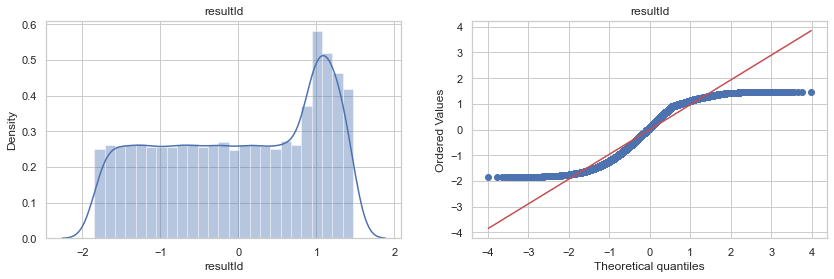

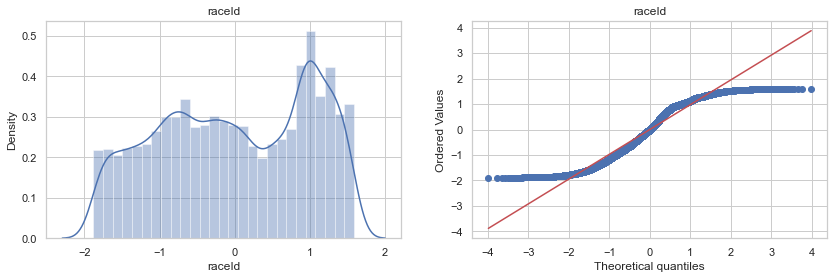

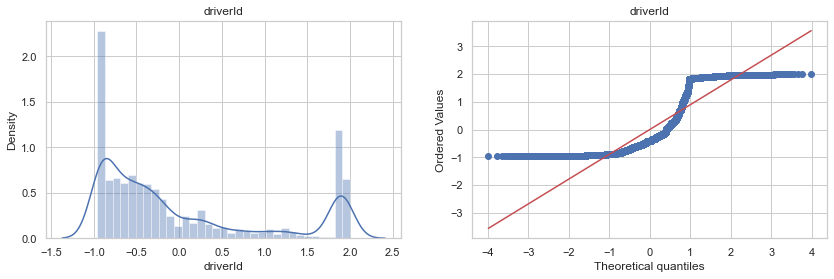

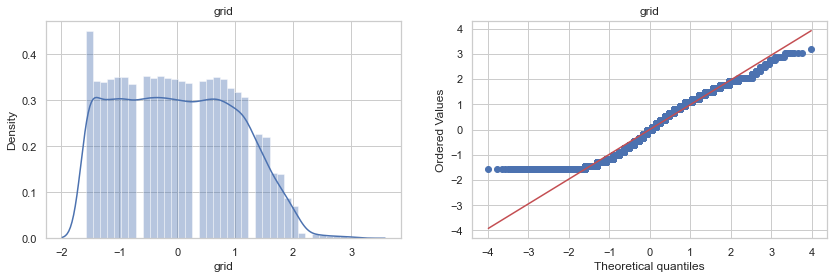

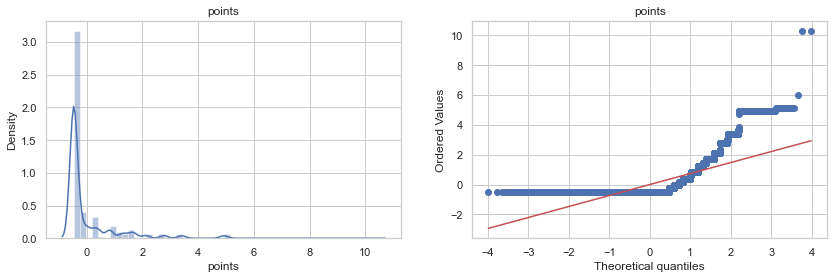

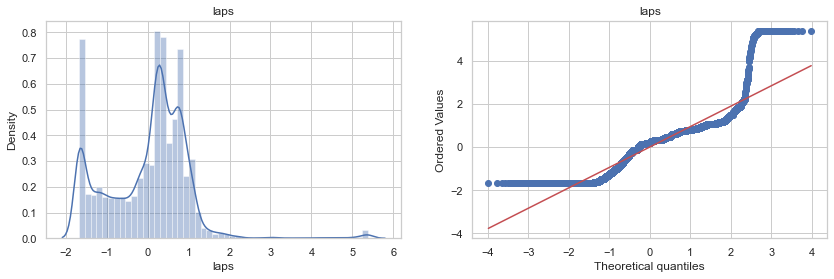

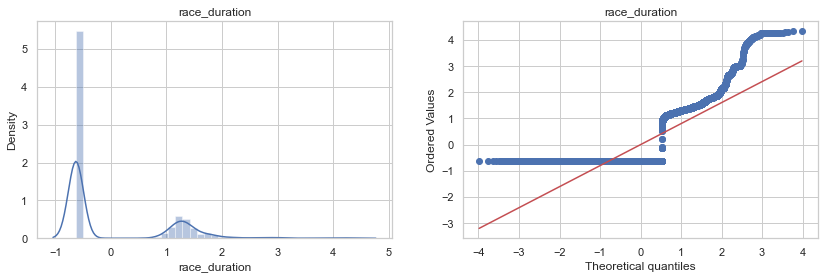

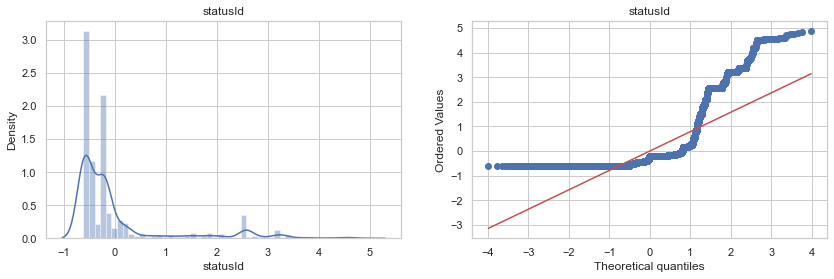

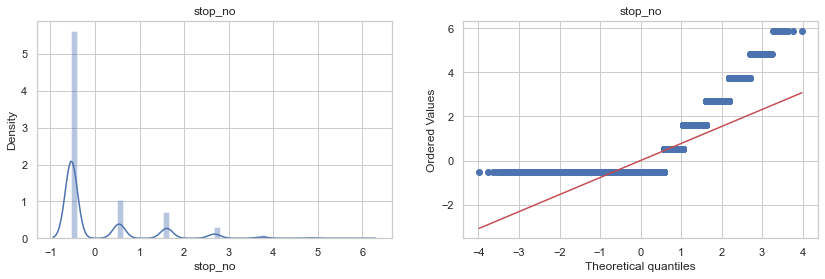

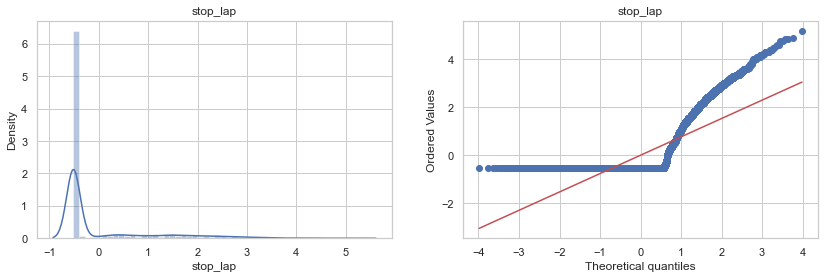

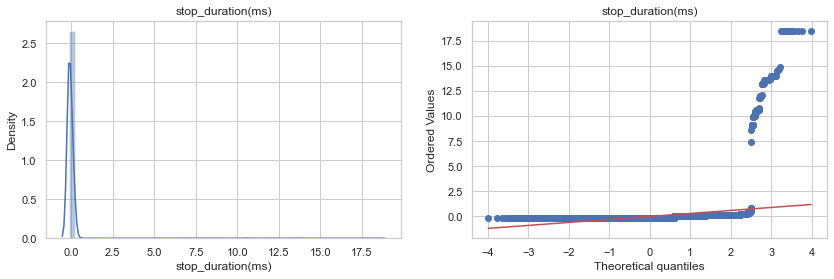

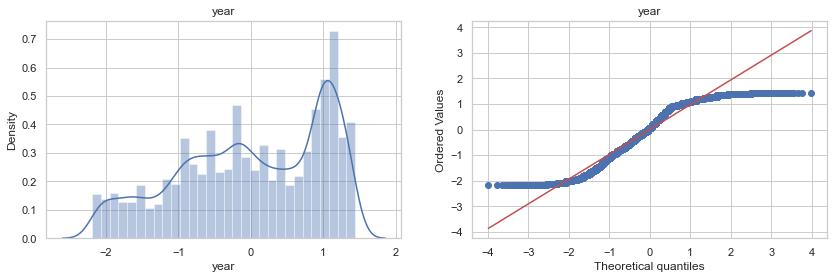

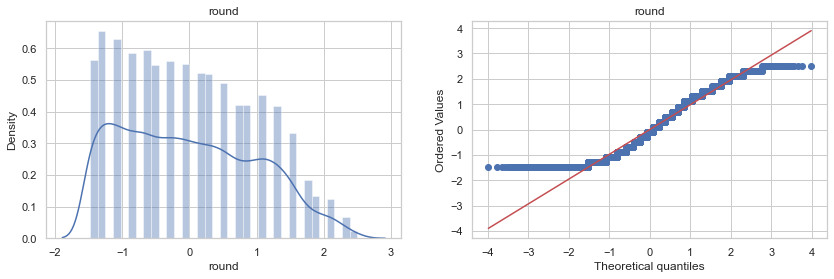

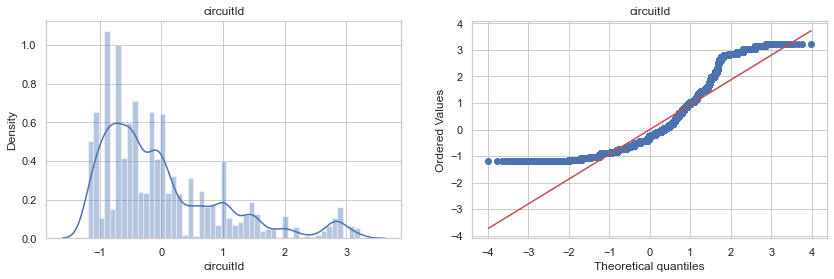

In [69]:
# Plotting the distplots without any transformation

for col in X_train_scaled1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_scaled1[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_scaled1[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

we can see data is not normally distributed

##### Know we apply 'Yeo-Johnson transform' for transformation

In [70]:
# Apply Yeo-Johnson transform

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train_scaled1)
X_test_transformed = pt.transform(X_test_scaled1)


pd.DataFrame({'cols':X_train_scaled1.columns,'Yeo_Johnson_lambdas':pt.lambdas_})


cols  Yeo_Johnson_lambdas
0            resultId             1.236096
1              raceId             1.134287
2            driverId            -0.194906
3                grid             0.867437
4              points            -1.954731
5                laps             0.928434
6       race_duration            -1.073626
7            statusId            -1.178774
8             stop_no            -1.610060
9            stop_lap            -1.843928
10  stop_duration(ms)            -7.974563
11               year             1.346169
12              round             0.734292
13          circuitId             0.047109

In [71]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train_scaled1.columns)

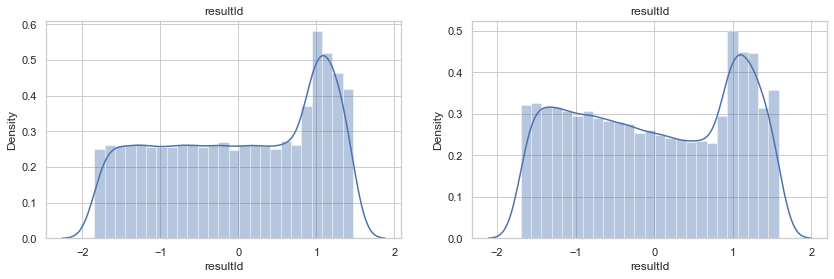

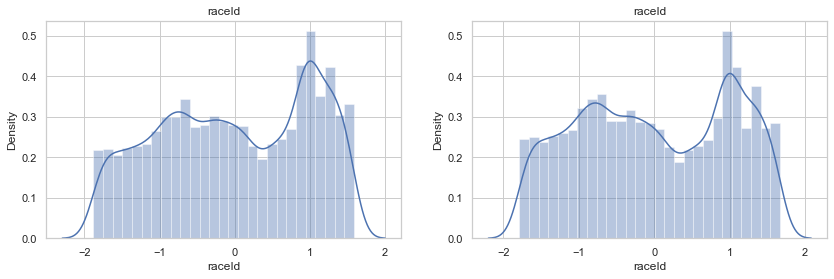

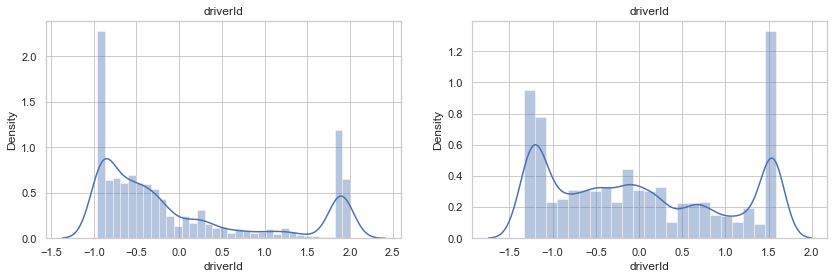

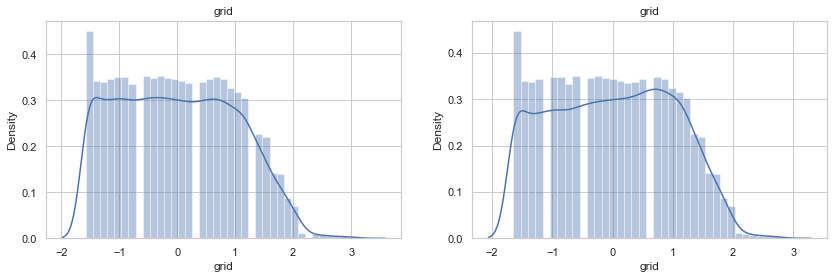

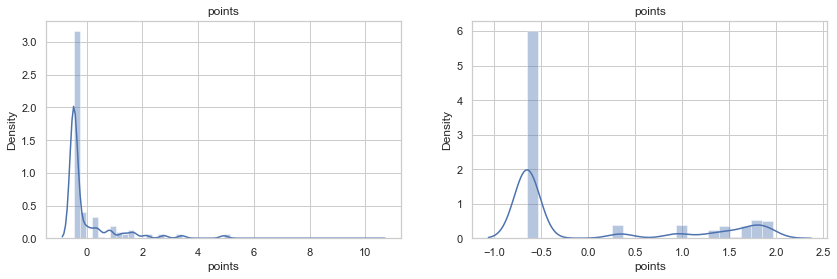

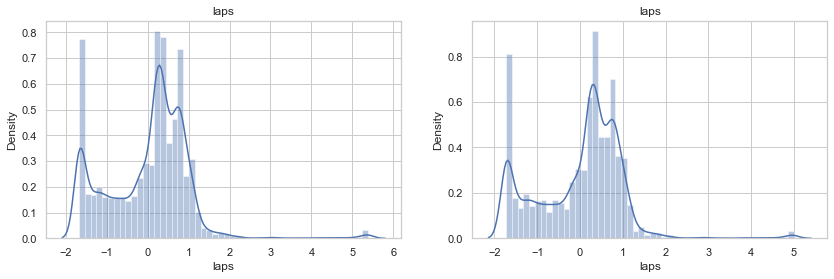

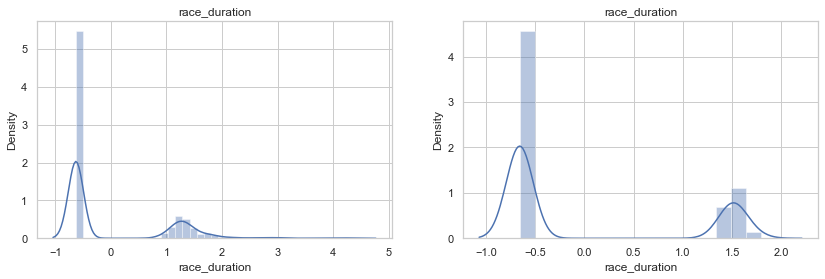

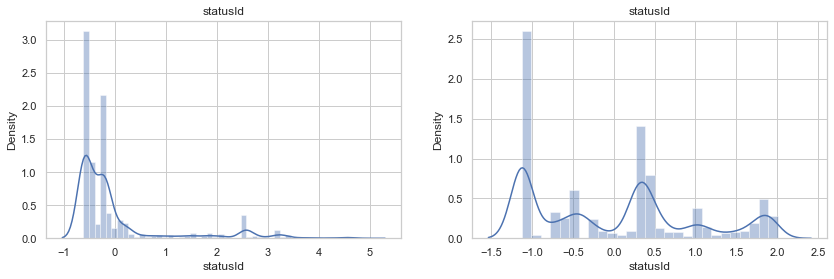

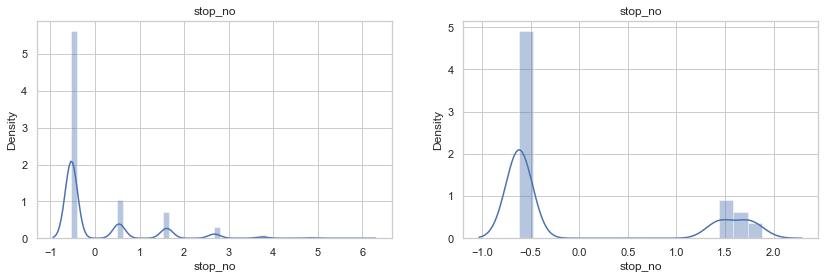

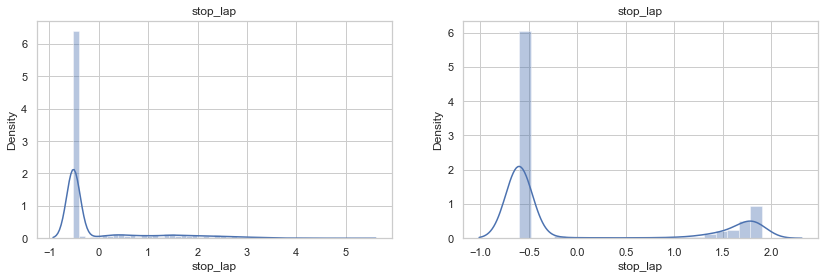

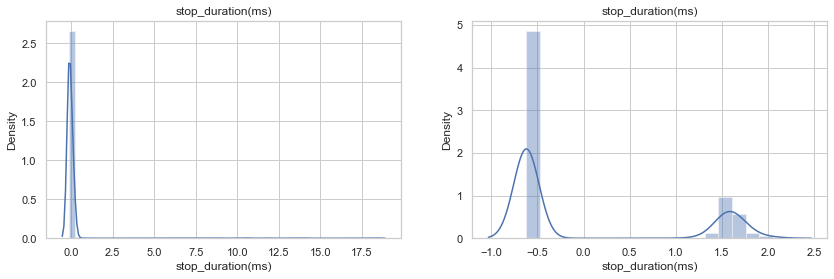

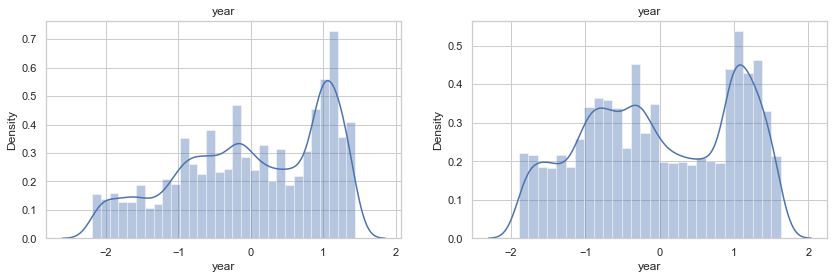

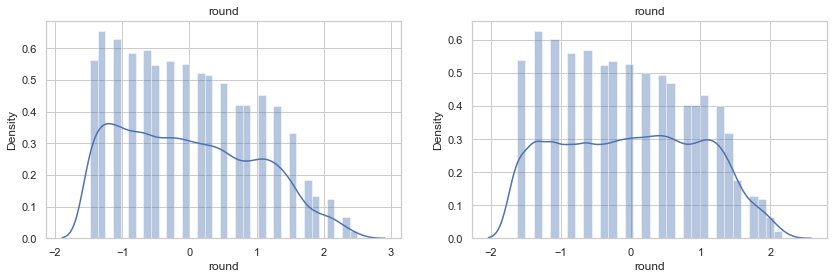

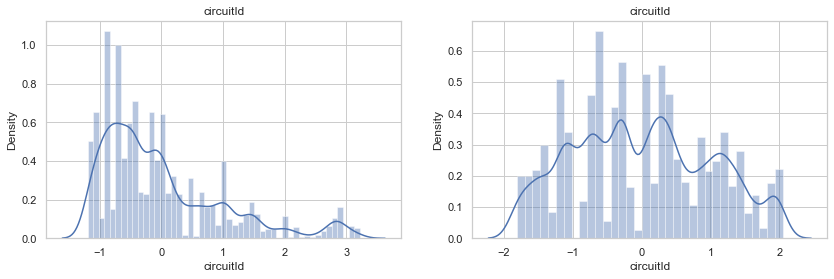

In [72]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_scaled1[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()


##### Applying diffrent models on the data:-

In [73]:
# Applying Gaussian Naive Bayes on transformed data


gnb = GaussianNB()
gnb.fit(X_train_transformed,y_train1)
y_pred1 = gnb.predict(X_test_transformed)
G_as = accuracy_score(y_test1,y_pred1)
G_as

0.9031634046426946

In [74]:
##checking classification_report

G_cr = classification_report(y_test1,y_pred1)
print(G_cr)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7616
           1       0.59      0.94      0.72      1172

    accuracy                           0.90      8788
   macro avg       0.79      0.92      0.83      8788
weighted avg       0.94      0.90      0.91      8788



In [75]:
# Applying Logistic regression on transformed data


Lr = LogisticRegression()
Lr.fit(X_train_transformed,y_train1)
y_pred2 = Lr.predict(X_test_transformed)
L_as = accuracy_score(y_test1,y_pred2)
L_as

0.9797451069640418

In [76]:
##checking classification_report

L_cr = classification_report(y_test1,y_pred2)
print(L_cr)
    

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7616
           1       0.92      0.93      0.92      1172

    accuracy                           0.98      8788
   macro avg       0.95      0.96      0.96      8788
weighted avg       0.98      0.98      0.98      8788



In [77]:
# Applying Decision Tree on transformed data

dt = DecisionTreeClassifier()
dt.fit(X_train_transformed,y_train1)
y_pred3 = dt.predict(X_test_transformed)
D_as = accuracy_score(y_test1,y_pred3)
D_as

0.9980655439235321

In [78]:
##checking classification_report

D_cr = classification_report(y_test1,y_pred3)
print(D_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7616
           1       0.99      0.99      0.99      1172

    accuracy                           1.00      8788
   macro avg       0.99      1.00      1.00      8788
weighted avg       1.00      1.00      1.00      8788



##### Approach 2. We drop these 3 columns to check model performance

In [79]:
df_cond2 = new_merged.drop(['stop_no','stop_lap','stop_duration(ms)'],axis=1)
df_cond2

resultId  raceId  driverId  grid  position  points  laps  \
0             1      18         1     1         1    10.0    58   
1             2      18         2     5         1     8.0    58   
2             3      18         3     7         1     6.0    58   
3             4      18         4    11         0     5.0    58   
4             5      18         5     3         0     4.0    58   
...         ...     ...       ...   ...       ...     ...   ...   
29288     25043    1055       854    18         0     0.0    64   
29289     25043    1055       854    18         0     0.0    64   
29290     25044    1055       853    20         0     0.0    64   
29291     25044    1055       853    20         0     0.0    64   
29292     25045    1055       852    16         0     0.0     6   

       race_duration  statusId  year  round  circuitId              race_name  \
0            5690616         1  2008      1          1  Australian Grand Prix   
1            5696094         1  2008      1          1  Australian Grand Prix   
2            5698779         1  2008      1          1  Australian Grand Prix   
3            5707797         1  2008      1          1  Australian Grand Prix   
4            5708630         1  2008      1          1  Australian Grand Prix   
...              ...       ...   ...    ...        ...                    ...   
29288              0        12  2021      4          4     Spanish Grand Prix   
29289              0        12  2021      4          4     Spanish Grand Prix   
29290              0        12  2021      4          4     Spanish Grand Prix   
29291              0        12  2021      4          4     Spanish Grand Prix   
29292              0        10  2021      4          4     Spanish Grand Prix   

      nationality             driver  
0         British     Lewis Hamilton  
1          German      Nick Heidfeld  
2          German       Nico Rosberg  
3         Spanish    Fernando Alonso  
4         Finnish  Heikki Kovalainen  
...           ...                ...  
29288      German    Mick Schumacher  
29289      German    Mick Schumacher  
29290     Russian     Nikita Mazepin  
29291     Russian     Nikita Mazepin  
29292    Japanese       Yuki Tsunoda  

[29293 rows x 15 columns]

### Train-Test spilt(Condition:2)

In [80]:
y2 = df_cond2['position']
X2 = df_cond2.drop(['driver','nationality','race_name','position'],axis=1)

In [81]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,random_state=10,test_size=0.3)


print("Shape of X_train1:",X_train2.shape)
print("Shape of X_test1:",X_test2.shape)
print("Shape of y_train1:",y_train2.shape)
print("Shape of y_test1:",y_test2.shape)

Shape of X_train1: (20505, 11)
Shape of X_test1: (8788, 11)
Shape of y_train1: (20505,)
Shape of y_test1: (8788,)


###### Scaled our data using 'StandardScaler'

In [82]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train2)

# transform train and test sets
X_train_scaled2 = scaler.transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [83]:
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train2.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=X_test2.columns)

In [84]:
X_train_scaled2.head()

resultId    raceId  driverId      grid    points      laps  race_duration  \
0 -0.797118 -0.710143 -0.499648 -0.317068 -0.469186  0.337949      -0.628599   
1 -0.313255 -0.291695 -0.350684  0.939419  0.177068  0.514509       1.799673   
2 -1.072705 -0.957258 -0.884184  0.799809 -0.469186 -0.474225      -0.628599   
3 -1.197010 -1.075873 -0.634755  1.218638 -0.469186 -0.862656      -0.628599   
4 -1.438876 -1.346052 -0.766398 -0.177458  0.177068  1.079499       1.577972   

   statusId      year     round  circuitId  
0 -0.214169 -0.194547 -1.280271  -0.019384  
1 -0.612559 -0.602871 -1.280271   0.863485  
2  2.016815  0.009616  0.310974  -0.666821  
3 -0.413364  0.111697 -0.285743  -0.784537  
4 -0.612559  0.366900 -0.285743  -0.902252

In [85]:
X_test_scaled2.head()

resultId    raceId  driverId      grid    points      laps  race_duration  \
0 -1.168843 -1.046219 -0.665934  1.079028 -0.469186 -0.862656      -0.628599   
1 -1.429883 -1.336167 -0.742148 -0.317068 -0.253768  0.797004      -0.628599   
2  0.299674  0.275022  0.279815 -1.294336 -0.469186 -0.121106      -0.628599   
3 -1.252683 -1.135181 -0.884184 -0.317068 -0.038350  0.549821       1.302076   
4  0.431252  0.449650  0.522315 -1.573555 -0.469186 -1.674830      -0.628599   

   statusId      year     round  circuitId  
0  0.144382  0.111697  1.504407   0.039474  
1 -0.214169  0.366900  0.310974   0.098332  
2  1.259874 -1.215358 -1.479176   0.510337  
3 -0.612559  0.162737 -0.683554  -0.019384  
4  2.574561 -1.470561 -1.479176  -0.902252

###### Check if transformation is needed or not?

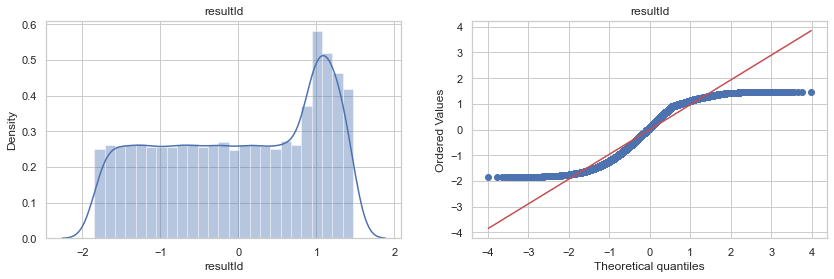

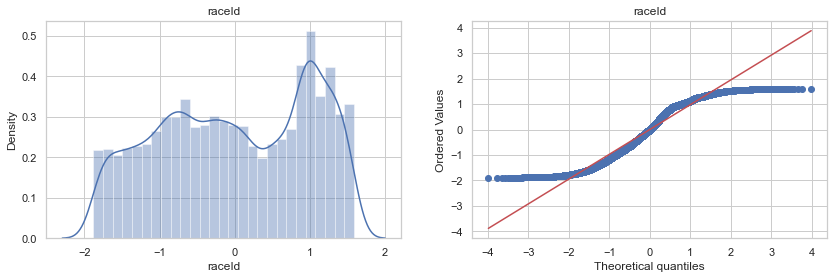

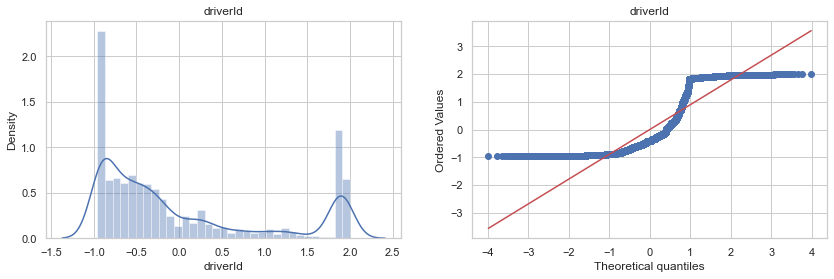

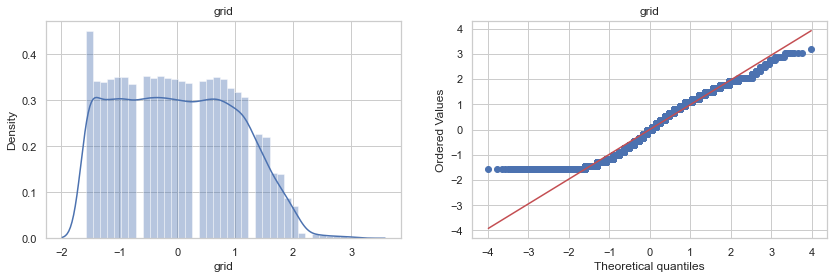

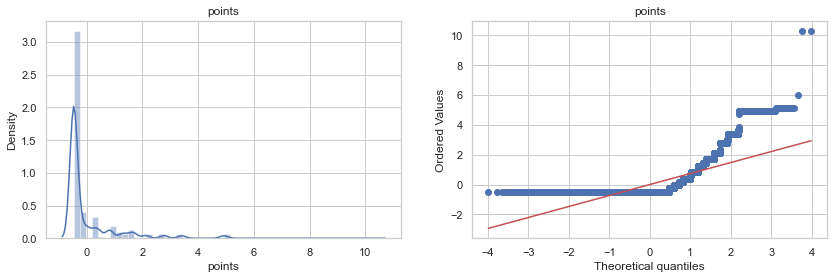

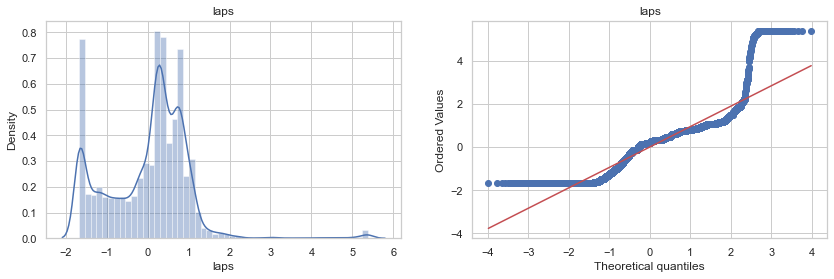

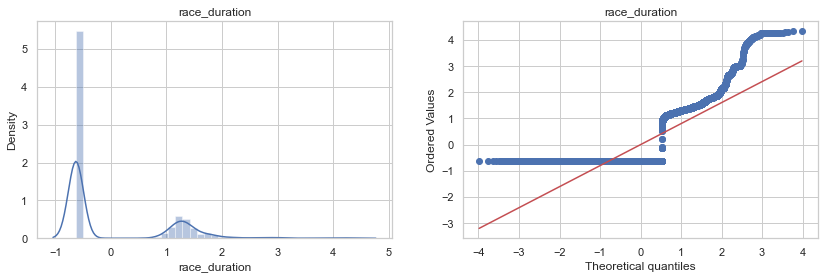

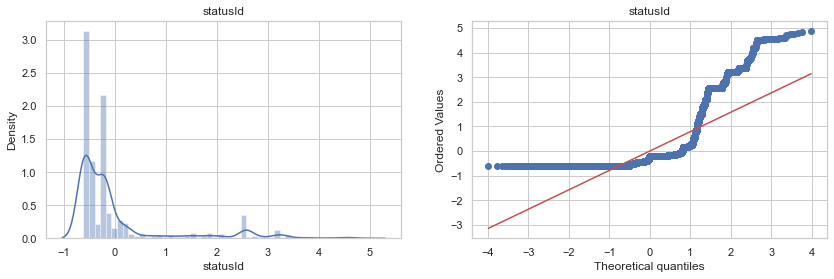

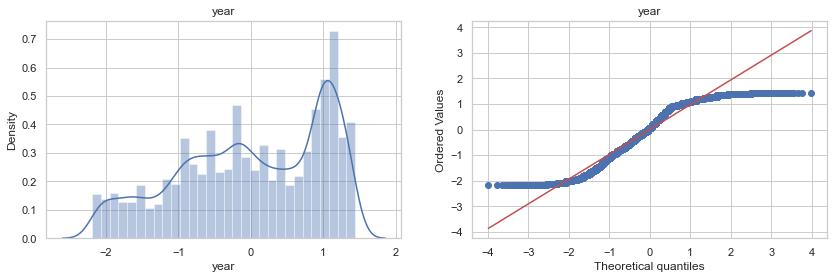

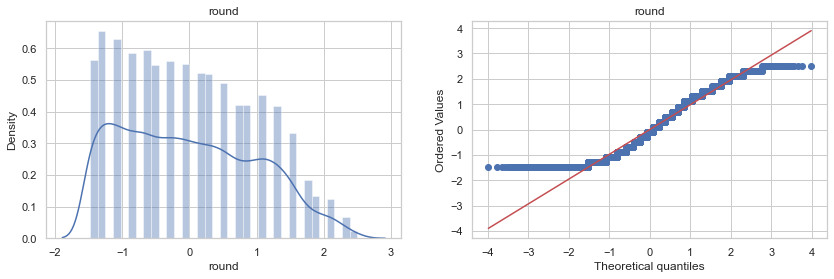

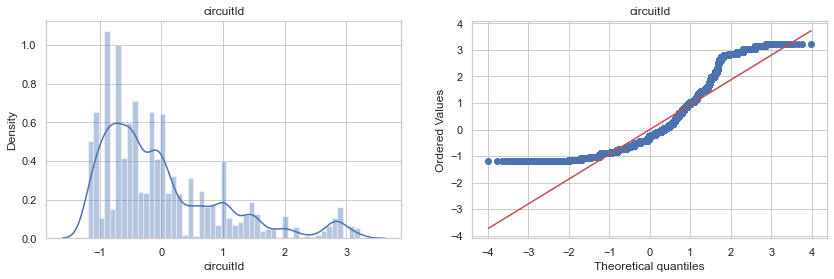

In [86]:
# Plotting the distplots without any transformation

for col in X_train_scaled2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_scaled2[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_scaled2[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

we can see data is not normally distributed

###### Know we apply 'Yeo-Johnson transform' for transformation

In [87]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed1 = pt.fit_transform(X_train_scaled2)
X_test_transformed1 = pt.transform(X_test_scaled2)


pd.DataFrame({'cols':X_train_scaled2.columns,'Yeo_Johnson_lambdas':pt.lambdas_})

cols  Yeo_Johnson_lambdas
0        resultId             1.236096
1          raceId             1.134287
2        driverId            -0.194906
3            grid             0.867437
4          points            -1.954731
5            laps             0.928434
6   race_duration            -1.073626
7        statusId            -1.178774
8            year             1.346169
9           round             0.734292
10      circuitId             0.047109

In [88]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1,columns=X_train_scaled2.columns)

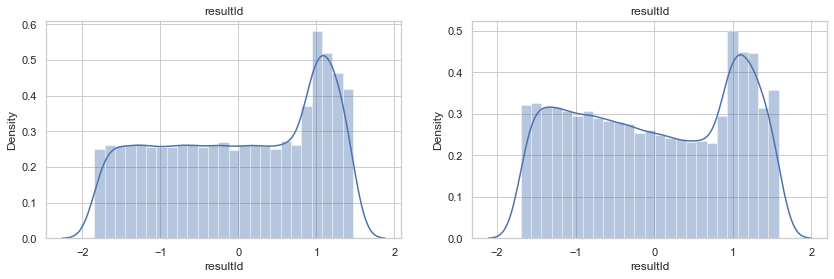

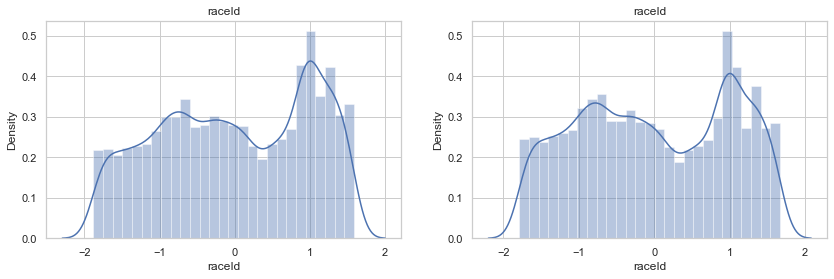

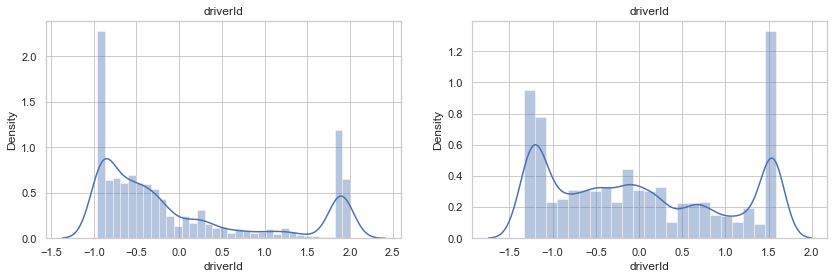

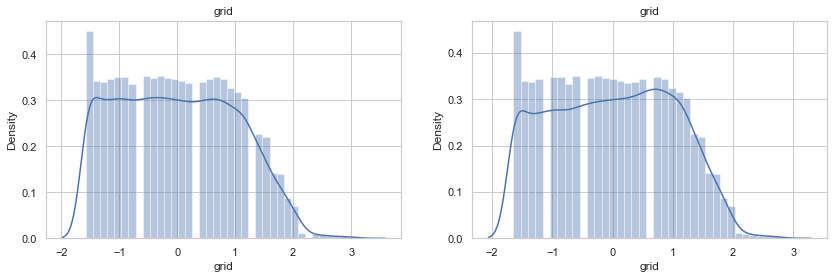

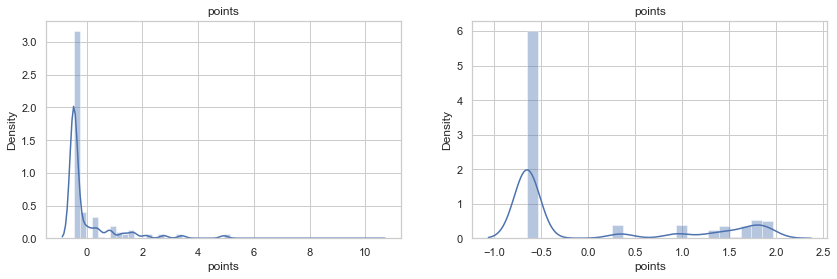

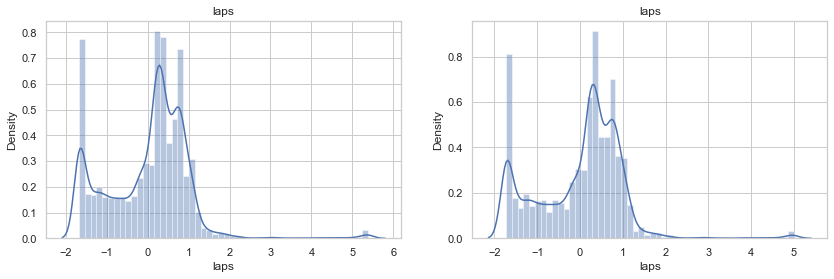

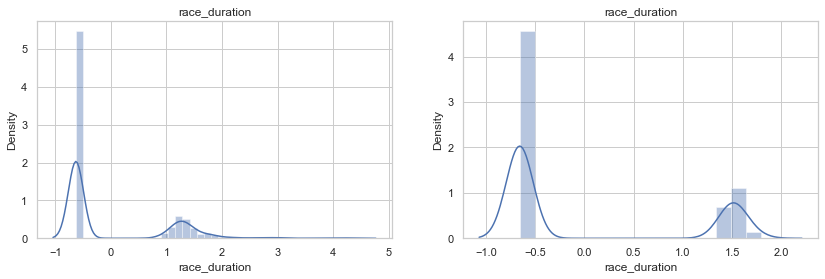

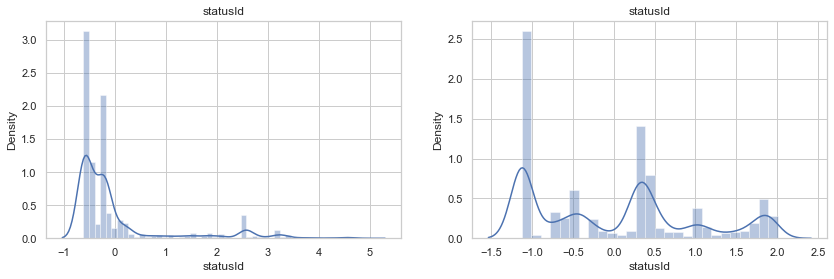

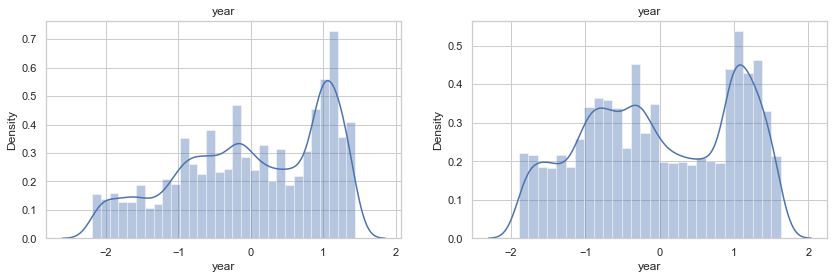

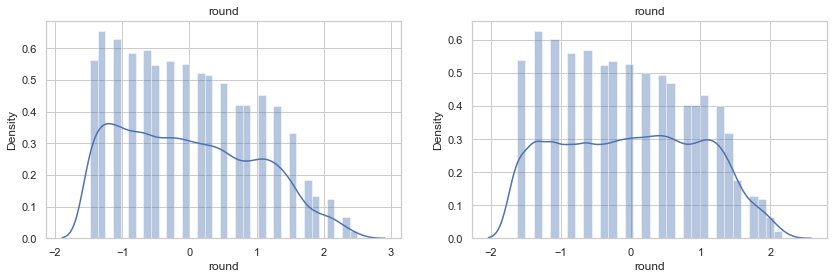

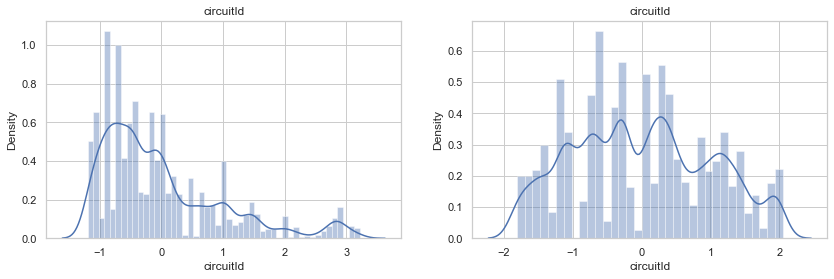

In [89]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train_scaled2[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed1[col])
    plt.title(col)

    plt.show()

##### Applying diffrent models on the data:-

In [90]:
# Applying Gaussian Naive Bayes on transformed data


gnb = GaussianNB()
gnb.fit(X_train_transformed1,y_train2)
y_pred4 = gnb.predict(X_test_transformed1)
G_as1 = accuracy_score(y_test2,y_pred4)
G_as1

0.9032771961766045

In [91]:
##checking classification_report

G_cr1 = classification_report(y_test2,y_pred4)
print(G_cr1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7616
           1       0.59      0.94      0.72      1172

    accuracy                           0.90      8788
   macro avg       0.79      0.92      0.83      8788
weighted avg       0.94      0.90      0.91      8788



In [92]:
# Applying Logistic regression on transformed data


Lr = LogisticRegression()
Lr.fit(X_train_transformed1,y_train2)
y_pred5 = Lr.predict(X_test_transformed1)
L_as1 = accuracy_score(y_test2,y_pred5)
L_as1



0.9758761948111061

In [93]:
##checking classification_report

L_cr1 = classification_report(y_test2,y_pred5)
print(L_cr1)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7616
           1       0.91      0.91      0.91      1172

    accuracy                           0.98      8788
   macro avg       0.95      0.95      0.95      8788
weighted avg       0.98      0.98      0.98      8788



In [94]:
# Applying Decision Tree on transformed data

dt = DecisionTreeClassifier()
dt.fit(X_train_transformed1,y_train2)
y_pred6 = dt.predict(X_test_transformed1)
D_as1 = accuracy_score(y_test2,y_pred6)
D_as1

0.9980655439235321

In [95]:
##checking classification_report

D_cr1 = classification_report(y_test2,y_pred6)
print(D_cr1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7616
           1       0.99      0.99      0.99      1172

    accuracy                           1.00      8788
   macro avg       0.99      1.00      1.00      8788
weighted avg       1.00      1.00      1.00      8788



## Accuracy_Score Table:-

In [101]:
data = [[G_as,L_as,D_as],[G_as1,L_as1,D_as1]]

AS = pd.DataFrame(data, columns = ['Naive_Bayes', 'Logistic_regression','Decision_Tree'],index =['Approach_1','Approach_2'])
AS

Naive_Bayes  Logistic_regression  Decision_Tree
Approach_1     0.903163             0.979745       0.998066
Approach_2     0.903277             0.975876       0.998066

1.In Naïve Bayes we get slight difference in both approaches.

2.Same in Logistic regression model

3.There is no difference in Decision Tree model.
